In [20]:
from neo4j import GraphDatabase

class HelloWorldExample:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def print_greeting(self, message):
        with self.driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_greeting, message)
            print(greeting)

    @staticmethod
    def _create_and_return_greeting(tx, message):
        result = tx.run("CREATE (a:Greeting) "
                        "SET a.message = $message "
                        "RETURN a.message + ', from node ' + id(a)", message=message)
        return result.single()[0]


greeter = HelloWorldExample("bolt://localhost:7687", "neo4j", "bollocks")
greeter.print_greeting("hello, world")
greeter.close()

hello, world, from node 2


# Run Server to get Roli data

In [0]:
!pip install flask_cors
from flask import request
from flask import Flask
from flask_cors import CORS

app = Flask(__name__)

CORS(app)
@app.route('/')
def login():
    data = request.args.get('data')
    f= open("testfile2.txt","a+")
    f.write (data)
    f.write ("\r\n")
    f.close()
    
    return (data)
    
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# Roli Seaboard Analysis

In [0]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import math
import json
from pandasql import sqldf
from mido import MidiFile


# mid = MidiFile('D:\\MUSICDAT\\REC_SONG.MID')

df = pd.DataFrame()

# Open the file with read only permit
fh = open('./testfile2.txt')
n =0
while True:
    # read line
    line = fh.readline()
    line = str(line).strip("'<>() ").replace('\'', '\"')
#     print (line)
    try:
        mymus = json.loads (line)
        df = df.append (mymus,ignore_index=True)
    #     # in python 2, print line
    #     # in python 3

    except:
        x = 1
   #     print ("X " + line + " X ")
#     n = n + 1
    # check if line is not empty
    if not line:
        break
fh.close()

print (len(df.index))
df.index.name = "idx"
pysqldf = lambda q: sqldf(q, globals())

topnote = pd.DataFrame()
bottomnote = pd.DataFrame()
pressurelist = list()
bendlist = list()
mdiv = 50

for t in range (1, int(len(df.index)/mdiv)):
    try:
        difflist = list()
        mydf = pysqldf ("Select round(pressure, 2) from df where idx < " + str(t * mdiv) + " and idx > " + str((t-1) * mdiv))
        difflist = mydf["round(pressure, 2)"].tolist()
        print (difflist)
        pressurelist.append (calcentropy (difflist))
    except:
        print ("end")

    try:
        mydf2 = pysqldf ("Select round(pitchbend, 2) from df where idx < " + str(t *mdiv) + " and idx > " + str((t-1) * mdiv))
        difflist2 = list()
        difflist2 = mydf2["round(pitchbend, 2)"].tolist()
        bendlist.append (calcentropy(difflist2))
    except:
        print ("end1")

mydf4 = pd.DataFrame()

mydf4["pressure"] = pressurelist

mydf4["bend"] = bendlist

print (mydf4)
templ = list()
oldx = 99
for x in pressurelist:
    if oldx != 99:
        if (x - oldx > 0):
            templ.append(1)
        else:
            templ.append(0)
    oldx = x
print ("*******************bend")
bindf = pd.DataFrame()
compl1 = list()
for x in templ:
    compl1.append(int(not x))
bindf["$A$"] = templ
bindf["$A*$"] = compl1

oldx = 99
templ = list()
for x in bendlist:
    if oldx != 99:
        if (x - oldx > 0):
            templ.append(1)
        else:
            templ.append (0)
    oldx = x
mydf4.plot(figsize=(15,3),color="black",style=["-","--", ":", "-."])

compl1 = list()

for x in templ:
    compl1.append(int(not x))
bindf["$B$"] = templ
bindf["$B*$"] = compl1

xnorlst = list()
for idx, row in bindf.iterrows():
    if (row[0] == row[1]):
        mval =1
    else:
        mval = 0
    xnorlst.append (mval)
bindf["$AB$"] = xnorlst
compl1 = list()
for x in xnorlst:
    compl1.append (int(not(x)))
bindf["$AB^*$"] = compl1

print (bindf.to_latex())



# totaltime = 0
# notesplayed = "notes: "

# totalnotes = pd.DataFrame()A\ZSQ?
# totalrhythm = pd.DataFrame()
# #print (mymus)
# for idx, msg in mymus.iterrows():
# #    print (msg)
#     if (msg[0] != 0):
#         rhythm = pd.DataFrame({'timedist': [msg[0]], 'time': [msg[1]]})
#         totalrhythm = pd.concat ([totalrhythm, rhythm])        
#         totaltime = totaltime + msg[0]
#         begin = False
#         try: 
#             var_2 = pd.DataFrame({ 'note': [msg[0]],'time': [msg[1]]})
#             totalnotes = pd.concat([totalnotes, var_2])
#         except:
#             n = ""
#     else:
#         try:
#             var_2 = pd.DataFrame({ 'note': [msg[0]],'time': [totaltime]})
#             totalnotes = pd.concat([totalnotes, var_2])
#             n = msg.note
#         except:
#             n = -99

#     totalnotes = pd.concat([totalnotes, var_2])
# print (totalrhythm)            
# print (totalnotes)



In [0]:
def returnbincalc (ent1, ent2):
    return (1)

# Entropy Prelim 

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations 
import sys
import math
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

# def combine(arr, s): 
#     return list(combinations(arr, s)) 
#     array = [21, 18, 19] 
#     set = 2
#     print(combine(array, set))

def complementlist(rlist):
    retlist = list()
    for val in rlist:
        if val == 0:
            retlist.append (1)
        else:
            retlist.append (0)
    return (retlist)

def getrelativelist (rlist):
    oldval = -99
    flist = list()
    for val in rlist:
        if oldval != -99:
            if ((val - oldval) > 0):
                bval = 1
            else:
                bval = 0
            flist.append (bval)
            
        oldval = val
    return (flist)

def getaggregatelist(columns, pmydf):
    retlist = list()
    oldcollistval = list()
#     print ("analysing length " + str(len (pmydf)))
    for row in pmydf.iterrows():
        collistval = list()
        for col in columns:
            collistval.append (row[1][col])
        xsum = 0
        for x in range (len(collistval)):
            calclist = list()            
            if len(oldcollistval) != 0:
                calclist.append (oldcollistval[x] - collistval[x])
#             print (collistval)
#             print (calclist)
            for val in calclist:
                xsum = xsum - val
        retlist.append (xsum)
        oldcollistval = collistval
    newlist = getrelativelist(retlist)
#     print ("newlist length " + str(len (newlist)))
    return (newlist)

def makebinary(pmydf,colnum):
  

    collist = list()

    for t in range (len (pmydf.columns)):
        
        collist.append (pmydf.columns.values[t])
        
#         collist.append (str(mydf.columns.values[t]) + "-neg")
    
    retlist = list(combinations(collist,colnum))
    rellist = list()
    retdf = pd.DataFrame()
    oldcol = -99
    for col in retlist:
        if len (col) == 1:
#             print (col[0])
#             rellist = getrelativelist(pmydf [pmydf.columns.values[0])
            rellist = getrelativelist(pmydf[col[0]])
            retdf[col[0]] = rellist
            retdf["not-" + str(col[0])] = complementlist(rellist)
        else:
#             for col2 in col:
#                 print (col2)
            rellist = getaggregatelist (col, pmydf)
            retdf[col] = rellist
            retdf["not-" + str(col)] = complementlist(rellist)
    
    return (retdf)   
# first make pairs for each column
#     for n in range (totdf.column)

import math

def contains(small, big):
    count =0
    for i in range(len(big)-len(small)+1):
        for j in range(len(small)):
            if big[i+j] != small[j]:
                break
        else:
#             return i, i+len(small)-1
            count=count + 1
    return (count)
def calcentropy (mylist):
    myset = set (mylist)
#     print ("set is: " + str(myset))
    total = 0
#    print ("len " + str (len(mylist)))
    myval = 0.0
    for row in myset:
#        print ("row " + str(row))
        probx = mylist.count(row)/len(mylist)
#         print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
#         print ("prob: " + str(probx))
        if (probx != 1):
#             print (probx * math.log(2, probx))
            myval = myval + probx * math.log(2,probx)
            
        else:
            myval = myval + probx * 0
    return (-myval)

def calcbarentropy (startbar, barlength, groupsize, intervallist):
    intarray = list()
    if ((barlength + startbar) < len(intervallist)):
        for z in range (startbar, barlength+startbar): 
            intarray = intarray + intervallist[z]
    else:
        for z in range (startbar, len(intervallist)): 
            intarray = intarray + intervallist[z]
    
    intcell = list()
    for x in range (len(intarray)-groupsize):
        intcell.append(str(intarray[x:x+groupsize]))
#     print (intcell)
    myset = set(intcell)
    alphabet = list()
    tempalph = list()
    for t in myset:
        t = t.replace ("['", "")
        t = t.replace ("']", "")
        t = t.replace ("[", "")
        t = t.replace ("]", "")
        t = t.replace (",", "")

        tempalph = t.split()

        tg = list()

        for o in range(groupsize):
            tg.append(int (tempalph[o]))
        alphabet.append (tg)
#     print ("set is: " + str(myset))
    total = 0
#     print (alphabet)
#    print ("len " + str (len(mylist)))
    myval = 1.0
    if (intarray != []):
        myval = 0.0
        for row in alphabet:
            print ("row " + str(row))
            print (row)
            print (mylist)
            probx = contains (row, intarray)/len(intarray)
#             print (probx)
    #         print (probx)
    #        print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
    #         print ("prob: " + str(probx))
            try:
                myval = myval + probx * math.log(2,probx)
            except:
                myval = myval + probx * 0
    return (-myval)

def calclistentropy (alphabet, mylist):
    myset = alphabet
#     print ("set is: " + str(myset))
    total = 0
#    print ("len " + str (len(mylist)))
    myval = 1.0
    if (mylist != []):
        myval = 0.0
        for row in myset:
    #        print ("row " + str(row))
    #         print (row)
    #         print (mylist)
            probx = contains (row, mylist)/len(mylist)
    #         print (probx)
    #        print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
    #         print ("prob: " + str(probx))
            try:
                myval = myval + probx * math.log(2,probx)
            except:
                myval = myval + probx * 0
    return (-myval)

('A', 'B')
('A', 'C')
('A', 'D')
('B', 'A')
('B', 'C')
('B', 'D')
('C', 'A')
('C', 'B')
('C', 'D')
('D', 'A')
('D', 'B')
('D', 'C')


In [8]:
import music21 as m21
import pandas as pd

# configure.run()
us = m21.environment.UserSettings()
us['musicxmlPath'] = 'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'
us['musescoreDirectPNGPath'] = 'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'

print (environment.get("musescoreDirectPNGPath"))
aScore = converter.parse ("bwv795.mxl")
chords = aScore.chordify()

for e in aScore.parts:
    print (e)
Flute = aScore.getElementById('Flute')
Viola = aScore.getElementById('Viola')
Bassoon = aScore.getElementById('Bassoon')
mlen = len(aScore.getElementsByClass('Part')[0].getElementsByClass('Measure'))

aScore.show()

C:\Program Files\MuseScore 3\bin\MuseScore3.exe
<music21.stream.Part Flute>
<music21.stream.Part Viola>
<music21.stream.Part Bassoon>


SubConverterFileIOException: png file of xml not found. Or file >999 pages?

<music21.stream.Part Flute>
<music21.stream.Part Viola>
<music21.stream.Part Bassoon>
*********
row [-1, 0]
[-1, 0]
[[3, -1, 0, 3, -1], [6, 1, 0, -2, -2, -1, -2], [4, -1, -1], [-1, -1, 5, -1], [0, 1, -1, -2], [2, -3, 1, -1, 1, -4, -2, 1, -1], [5, 2, 1, 0, -2, 1, 0, -3], [-2, 1, 2, 1, 2, -2, 2, -2, -1], [-5, 6, -1, 0, 6, -1], [-2, -2, -1, 1, 1], [-12, 4, -2, 0, 3, -1], [6, 1, 0, -1, -2, -2, -2], [3, -1, -1], [-1, -1, 5, -1], [7, -1, 3], [3, -1, -7, 3, -1], [3, -1, 0, 3, -1], [3, -1, 0, 3, -1], [6, 1, 0, -2, -2, -1, -2], [1, 1, -2, -1, -2], [5, 2, 1, -2, -1, -2], [-2, -2, -1, 1, -2, -1, -2], [5, 2, 1, -2, -1, -2], [2, 1, 2, 0, -3, 1, 0, -3], [-2, 1, 2, 2, 1, -1, 1, -1, -2], [7, -1, -1], [-1, -1, 5, -1], [-5, 3, -1, 0, 3, -1], [3, -1, 0, -4, 5], [3, -2, 3], [-7, -1, -1], [-1, -1, 5, -1], [-12, 3, -1, 0, 3, -1], [6, 1, 0, -2, -2, -1, -2]]
row [0, 3]
[0, 3]
[[3, -1, 0, 3, -1], [6, 1, 0, -2, -2, -1, -2], [4, -1, -1], [-1, -1, 5, -1], [0, 1, -1, -2], [2, -3, 1, -1, 1, -4, -2, 1, -1], [5, 2, 1

4
5
6


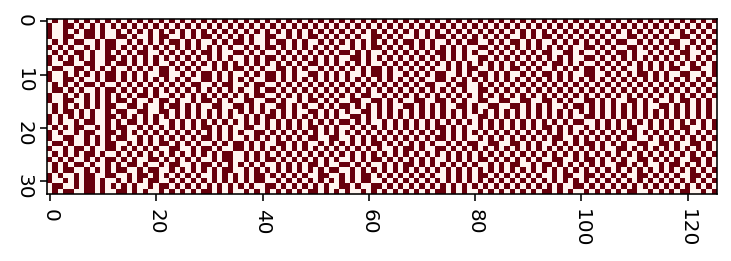

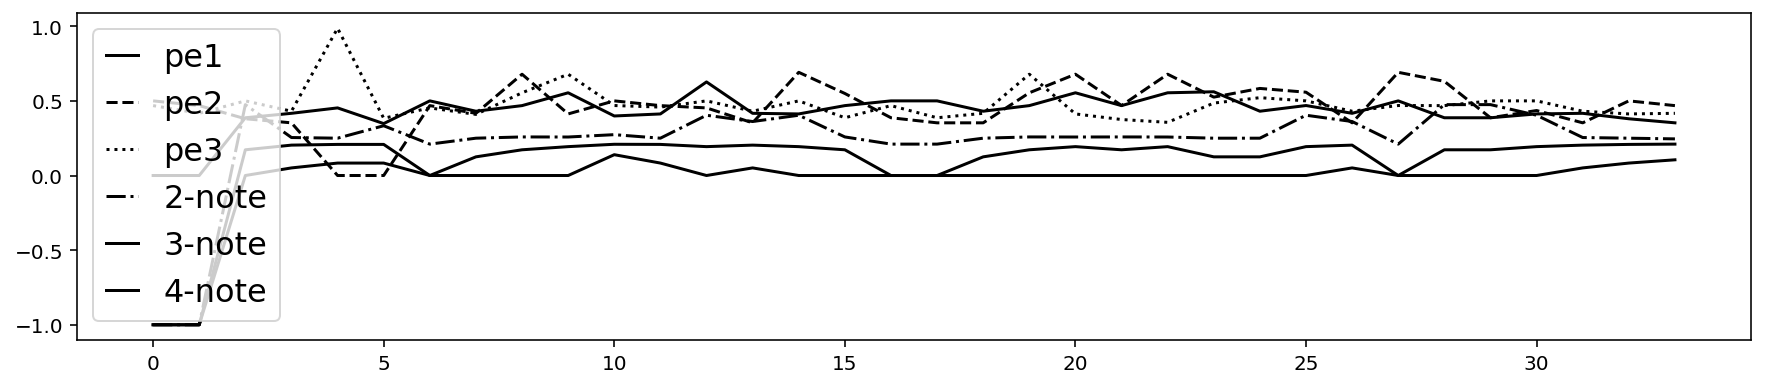

In [2]:
from music21 import *
import pandas as pd

aScore = converter.parse ("bwv795.mxl")
chords = aScore.chordify()

for e in aScore.parts:
    print (e)
Flute = aScore.getElementById('Flute')
Viola = aScore.getElementById('Viola')
Bassoon = aScore.getElementById('Bassoon')
mlen = len(aScore.getElementsByClass('Part')[0].getElementsByClass('Measure'))
df = pd.DataFrame()

test1 = list(list())

bi1 = 0
bi2 = 1
bi3 = 2
bl = 3
bd = 4

bl1 = 5
bd1 = 6

bl2 = 7
bd2 = 8

bn1 = 9
bn2 = 10
bn3 = 11

#print (mlen)
for t in range (12):
    test1.append(list())

# for t in Flute.flat:
#     print (t)
    
for t in range(1, mlen):
#     print ("Measure " + str(t))
    mRange = Flute.measures(t,t)
    mRange1 = Bassoon.measures(t,t)
    mRange2 = Viola.measures(t,t)

#    print (mRange)
    l=list()
    l1=list()
    l2=list()
    d=list()
    d1=list()
    d2=list()
    n1=list()
    i1=list()
    i2 = list()
    i3= list()

    
    #', '.join([str(p) for p in mRange.pitches])
    aStream = stream.Stream()
    oldn = 99
    for n in mRange.flat.notes:
#         print (n.duration)
#         print (n.pitch)
        l.append(n.pitch)
        if (oldn != 99):
            i1.append (interval.notesToChromatic(oldn.pitch, n.pitch).semitones)
        d.append (n.duration.quarterLength)
        oldn = n
    oldn=99
    for n in mRange1.flat.notes:
#         print (n.duration)
#         print (n.pitch)
        if (oldn != 99):
            i2.append (interval.notesToChromatic(oldn.pitch, n.pitch).semitones)

        l1.append(n.pitch)
        d1.append(n.duration.quarterLength)
        oldn = n
    oldn = 99
    for n in mRange2.flat.notes:
#         print (n.duration)
#         print (n.pitch)
        if (oldn != 99):
            i3.append (interval.notesToChromatic(oldn.pitch, n.pitch).semitones)

        l2.append(n.pitch)
        d2.append (n.duration.quarterLength)
        oldn = n
    mychord = chord.Chord (l)
    mychord1 = chord.Chord(l1)
    mychord2 = chord.Chord(l2)
    test1[9].append(l)
    test1[10].append(l1)
    test1[11].append(l2)

    try:
#       print ("Flute: " + str(mychord.primeForm))
        test1[0].append(i1)
#         n1.append(mychord.primeForm)
    except:
        test1[0].append ([])
#         n1.append([])
        True
    try:
#       print ("Flute: " + str(mychord.primeForm))
        test1[1].append(i2)
#         n1.append(mychord.primeForm)
    except:
        test1[1].append ([])
#         n1.append([])
        True
    try:
#       print ("Flute: " + str(mychord.primeForm))
        test1[2].append(i3)
#         n1.append(mychord.primeForm)
    except:
        test1[2].append ([])
#         n1.append([])
        True

    try:
#       print ("Flute: " + str(mychord.primeForm))
        test1[3].append(mychord)
#         n1.append(mychord.primeForm)
        test1[4].append(d)
    except:
        test1[3].append ([])
#         n1.append([])
        test1[4].append([])
        True
    try:
#       print ("Bassoon: " + str(mychord1.primeForm))
        test1[5].append(mychord1)
#       n2.append (mychord1.primeForm)
        test1[6].append(d1)
    except:
        test1[5].append([])
#       n2.append([])
        test1[6].append([])
        True
        
    try:
#       print ("Viola: " + str(mychord2.primeForm))
        test1[7].append(mychord2)
#       n3.append(mychord2.primeForm)
        test1[8].append(d2)
    except:
        test1[7].append([])
#       n3.append([])
        test1[8].append([])
        True

# print (setlist)

# df["l1"] = bl
# df["l2"] = bl1
# df["l3"] = bl2
df["bd"] = test1[4]
df["bd1"] = test1[6]
df["bd2"] = test1[8]
df["p1"] = test1[9]
df["p2"] = test1[10]
df["p3"] = test1[11]
df["bi1"] = test1[0]
df["bi2"] = test1[1]
df ["bi3"] = test1[2]
# df["p2"] = n2
# df ["p3"] = n3

rhythment1 = list()
rhythment2 = list()
rhythment3 = list()
pitchent1 = list()
pitchent2 = list()
pitchent3 = list()
int1 = list()
int2 = list()
int3 = list()

mylist = df["bd"].tolist()
for row in mylist:
    rhythment1.append (calcentropy (row))

mylist = df["bd1"].tolist()
for row in mylist:
    rhythment2.append (calcentropy (row))

mylist = df["bd2"].tolist()
for row in mylist:
    rhythment3.append (calcentropy (row))
    
mylist = df["p1"].tolist()
for row in mylist:
    pitchent1.append (calcentropy (row))
mylist = df["p2"].tolist()
for row in mylist:
    pitchent2.append (calcentropy (row))
mylist = df["p3"].tolist()
for row in mylist:
    pitchent3.append (calcentropy (row))    

mylist = df["bi1"].tolist()
for row in mylist:
    int1.append (calcentropy (row))
mylist = df["bi2"].tolist()
for row in mylist:
    int2.append (calcentropy (row))
mylist = df["bi3"].tolist()
for row in mylist:
    int3.append (calcentropy (row))

totaldf = pd.DataFrame()

duolist = list()
triolist = list()
quadlist = list()
print ("*********")
for u in range(len (test1[0])):
    duolist.append (calcbarentropy (u,1, 2, test1[0]))
    triolist.append (calcbarentropy (u,1, 3, test1[0]))
    quadlist.append (calcbarentropy (u,1, 6, test1[0]))

# totaldf["re1"] = rhythment1
# totaldf["re2"] = rhythment2
# totaldf["re3"] = rhythment3
totaldf["pe1"] = pitchent1
totaldf["pe2"] = pitchent2
totaldf["pe3"] = pitchent3
# totaldf["int1"] = int1
# totaldf ["int2"]= int2
# totaldf["int3"] = int3

totaldf ["2-note"] = duolist
totaldf ["3-note"] = triolist
totaldf ["4-note"] = quadlist

oldt = 99
intcell = list()
groupsize = 1

totaldf2 = pd.DataFrame()
# makebinary (totaldf, 2)
for y in range (1,7):
    print (y)
    df1 = makebinary(totaldf,y)
    for t in range (len (df1.columns)):
        mylist = df1[df1.columns.values[t]].tolist()
        totaldf2[str(df1.columns.values[t])] = mylist

import matplotlib.pyplot as plt
count = 0
params = {'legend.fontsize': 16,
          'legend.handlelength': 1,
         }
plt.rcParams.update(params)

# for idx,row in totaldf2.iterrows():
# #     print (row)

#     for n in range (0, len (totaldf2.columns.values)):
# #         print (row.iloc[n])
#         if (row.iloc[n] == 1):
            
#             plt.plot (count,n, "bs")
#     count = count + 1


fig, axs = plt.subplots()

data = totaldf2.values
axs.imshow(data, cmap="Reds")
plt.xticks(rotation=-90)
plt.yticks(rotation=-90)
plt.show()

totaldf.plot(figsize=(15,3),color="black",style=["-","--", ":", "-."])

                   # View in default viewer
# chords = aScore.chordify()
# chords.show()
# for c in chords.flat.getElementsByClass(chord.Chord):
#     print(harmony.chordSymbolFigureFromChord(c))
# print (totaldf2.to_latex(index=False))

C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: WavFileWarning: Chunk (non-data) not understood, skipping it.
C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


14
Frequency sampling 48000
total time:  14
sample time period:  0.1
total samples:  140
3780855
1644269
2241434
2036341
2427234
2638085
3936325
3933368
3987826
2789044
3957356
3566801
3366639
2243889
2255201
2740080
747930
1281375
1385826
1853529
2318448
1721639
1183295
1753791
1520919
2043260
1667115
1243129
1393999
1522171
1397392
1437153
1721211
1055558
1099182
1092448
1046217
1154949
21874308
16684344
6048891
1099857
1626868
4136369
3684430
2584426
2277833
1658581
1104104
1727936
1547325
1326165
1060236
2353094
3476553
1774377
1277039
2063812
1688693
1150042
1687522
1656952
871684
775351
1548394
928698
1004123
1180505
887368
672505
1024086
1079231
3206545
6309421
7424528
8115505
7704327
14695551
23155579
39861508
42509367
58549846
75347742
56800876
10322134
1798282
1056436
1756963
1736639
1173623
2297789
1416272
1047393
1429428
2025944
1078755
1556432
1167724
754123
1458292
1139240
614503
1531786
914620
1787945
1129390
970540
1386979
1621184
1184887
1887286
940857
916080
1642815
1

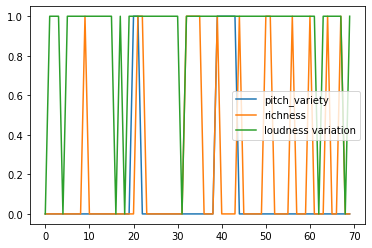

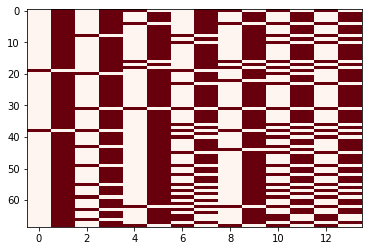

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from datetime import datetime, timedelta
import nltk
import numpy

filename = "uuu.wav"
megalist = list()

# ==============================================

time_period = 0.1 # FFT time period (in seconds). Can comfortably process time frames from 0.05 seconds - 10 seconds

# ==============================================

fs_rate, signal_original = wavfile.read(filename)
total_time = int(np.floor(len(signal_original)/fs_rate))
print (total_time)
sample_range = np.arange(0,total_time,time_period)
total_samples = len(sample_range)

print ("Frequency sampling", fs_rate)
print ("total time: ", total_time)
print ("sample time period: ", time_period)
print ("total samples: ", total_samples)
count = 0
megalist2 = list()
microlist2 = list()
microlist = list()
freqlist = list()
megalist = list()
output_array = []
minfreq = list()
for i in sample_range:

#     print ("Processing: %d / %d (%d%%)" % (i/time_period + 1, total_samples, (i/time_period + 1)*100/total_samples))

    sample_start = int(i*fs_rate)
    sample_end = int((i+time_period)*fs_rate)
    signal = signal_original[sample_start:sample_end]

    l_audio = len(signal.shape)
    #print ("Channels", l_audio)

    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    #print ("Complete Samplings N", N)

    secs = N / float(fs_rate)
#     print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
#     print ("Timestep between samples Ts", Ts)

    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

    FFT = abs(scipy.fft(signal))
    FFT_side = FFT[range(int(N/2))] # one side FFT range

    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(int(N/2))] # one side frequency range
    fft_freqs_side = np.array(freqs_side)


    # Reduce to 0-5000 Hz
    bucket_size = 5
    buckets = 16

    FFT_side = FFT_side[0:bucket_size*buckets]

    fft_freqs_side = fft_freqs_side[0:bucket_size*buckets]

    # Combine frequencies into buckets
    FFT_side = np.array([int(sum(FFT_side[current: current+bucket_size])) for current in range(0, len(FFT_side), bucket_size)])
    fft_freqs_side = np.array([int(sum(fft_freqs_side[current: current+bucket_size])) for current in range(0, len(fft_freqs_side), bucket_size)])

    # FFT_side: Normalize (0-1)
    max_value = max(FFT_side)
    print (max_value)
    maxidx = 0
    fmax = 0
    countmax = 0
    
    for t in FFT_side:
        if t > (max_value - 500000):
            countmax = countmax + 1
        if t == max_value:
#             print ("freq index " + str(idx))
            fmax = maxidx
        maxidx= maxidx + 1
 
    
#     print (str(max_value) +", max freq: " + str(fft_freqs_side[fmax]) + " countmax: " + str(countmax))    
    if (max_value != 0):
        FFT_side_norm = FFT_side / max_value

    # Append to output array
#     output_array.append(FFT_side_norm)
    modval = int( total_samples/50)
#     print ("modval " + str(modval))
    if (count%modval == 0):
        freqlist.append (minfreq)
        megalist.append (microlist)
        megalist2.append (microlist2)
        microlist = list()
        minfreq = list()
        microlist2 = list()
        minfreq.append (round(max_value/100000))
        microlist.append (fft_freqs_side[fmax])
        microlist2.append (countmax)
#         print ("new group")
    else:
        microlist.append (fft_freqs_side[fmax])
        microlist2.append (countmax)
        minfreq.append (round(max_value/100000))
    count= count +1 
    

# print (megalist)
# print (freqlist)
entropylist = list()
entropylist2 = list()
entropylist3 = list()
for n in megalist:
    entropylist.append(calcentropy(n))
#     print (calcentropy (n))
for n in megalist2:
    entropylist2.append(calcentropy(n))
#     print (calcentropy (n))
for n in freqlist:
    entropylist3.append(calcentropy(n))
    

        
def tokenize(text):
    from nltk.tokenize import RegexpTokenizer

    tokenizer = RegexpTokenizer(r'\w+')
#         tokens = nl.WhitespaceTokenizer().tokenize(text)
#         tokens = list(set(re.sub("[^a-zA-Z\']", "", token) for token in tokens))
#         tokens = [word for word in tokens if word not in stopwords.words('english')]
#         tokens = list(set(re.sub("[^a-zA-Z]", "", token) for token in tokens))
#         stems = []
#         stemmer = SnowballStemmer("russian")
#         for token in tokens:
#             token = stemmer.stem(token)
#             if token != "":
#                 stems.append(token)
#         return stems 
    stemmer = SnowballStemmer("russian") 
    stop_words = stopwords.words('russian')
    my_words = tokenizer.tokenize(text)

    l=[stemmer.stem(word) for word in my_words if not word in stop_words]
    print (l)
    
myfile = open ("captions.sbv", "r", encoding="utf-8")
mytime = 0
oldsecs = 0
mytext4 = ""
currenttext = ""
timelist= list()
textlist = list()
secondspassed = 0
contents = myfile.readlines()
for row in contents:
    if row[0] != "\n":
        if row[0] == "0": 
            oldtime= mytime
            mytime = datetime.strptime (row[:row.find(",")].strip(), "%H:%M:%S.%f")
            myseconds = mytime.timetuple()
            secondspassed = myseconds[4]*60 + myseconds[5]
            for t in range (oldsecs, secondspassed):                
                timelist.append (t)
                textlist.append (currenttext)
            oldsecs = secondspassed
        else:
            if (row[0] != ""):
                currenttext = row[:-1]
                mytext4 = mytext4 + " " + row[:-1]

totallist = pd.DataFrame()
textentropylist = list()
# print (mytext4)
for n in range (len(textlist)):
    minilist = list()
    words = mytext4[mytext4.find(textlist[n-5]):mytext4.find (textlist[n])]
    textentropylist.append (calcentropy (words.split()))
    
textentropylist.append (0)
textentropylist.append (0)
totaldf = pd.DataFrame()
totaldf["pitch_variety"] = entropylist
totaldf["richness"] = entropylist2
totaldf["loudness variation"] = entropylist3
# totaldf["textentropy"] = textentropylist

totaldf.plot()
totaldf2 = pd.DataFrame()

for y in range (1,4):
#     print (y)
    df1 = makebinary(totaldf,y)
#     print (df1)
    for t in range (len (df1.columns)):
        mylist = df1[df1.columns.values[t]].tolist()
        totaldf2[str(df1.columns.values[t])] = mylist

        
# count = 0
# params = {'legend.fontsize': 16,
#   'legend.handlelength': 1,
#  }
# plt.rcParams.update(params)

fig, axs = plt.subplots()

data = totaldf2.values
axs.imshow( data, cmap="Reds", aspect='auto')

plt.show()


In [31]:

print (len (entropylist))


168


In [4]:
import pandas as pd
import time
from datetime import datetime, timedelta
import nltk
import numpy

def tokenize(text):
    from nltk.tokenize import RegexpTokenizer

    tokenizer = RegexpTokenizer(r'\w+')
#         tokens = nl.WhitespaceTokenizer().tokenize(text)
#         tokens = list(set(re.sub("[^a-zA-Z\']", "", token) for token in tokens))
#         tokens = [word for word in tokens if word not in stopwords.words('english')]
#         tokens = list(set(re.sub("[^a-zA-Z]", "", token) for token in tokens))
#         stems = []
#         stemmer = SnowballStemmer("russian")
#         for token in tokens:
#             token = stemmer.stem(token)
#             if token != "":
#                 stems.append(token)
#         return stems 
    stemmer = SnowballStemmer("russian") 
    stop_words = stopwords.words('russian')
    my_words = tokenizer.tokenize(text)

    l=[stemmer.stem(word) for word in my_words if not word in stop_words]
    print (l)
    
myfile = open ("captions.sbv", "r", encoding="utf-8")
mytime = 0
oldsecs = 0
mytext4 = ""
currenttext = ""
timelist= list()
textlist = list()
secondspassed = 0
contents = myfile.readlines()
for row in contents:
    if row[0] != "\n":
        if row[0] == "0": 
            oldtime= mytime
            mytime = datetime.strptime (row[:row.find(",")].strip(), "%H:%M:%S.%f")
            myseconds = mytime.timetuple()
            secondspassed = myseconds[4]*60 + myseconds[5]
            for t in range (oldsecs, secondspassed):                
                timelist.append (t)
                textlist.append (currenttext)
            oldsecs = secondspassed
        else:
            if (row[0] != ""):
                currenttext = row[:-1]
                mytext4 = mytext4 + " " + row[:-1]

totallist = pd.DataFrame()

print (mytext4)
for n in range (len(textlist)):
    minilist = list()
    words = mytext4[mytext4.find(textlist[n-5]):mytext4.find (textlist[n])]
    print (calcentropy (words.split()))
print (textlist2)

# totallist["time"] = timelist
# totallist["text"] = textlist2

# mylist = totallist["text"].tolist()
# for t in numpy.arange (0, len (totallist),1):
#     print (t)
#     print (mylist[int (t-5):int (t+5)])
#     print (calcentropy(mylist[int (t-5):int (t+5)]))

        

 а затем мирно александровна добрый день здравствуйте елена александровна можете подсказать вообще прочту этот курс это внешний со пленарный курс и мы пока не хотим раскрывать все секреты по прохождении курса вы узнаете о чем печали елена александровна вот я не понимаю я не вижу надобности в этом курсе что здесь могу получить я поступал на специальность я хочу быть профессионалом специалиста а это что я не понимают один остался прежде всего вы поступили в университет вы попали в эту химическую среду в которой очень важно налаживать хорошую коммуникацию поэта поэтому этот курс прежде всего о коммуникации медленно александров я могу коммуницировать и и рамок этого я это прекрасно делаю если у меня тут потребности я буду коммуницировать если не будет у него потребности я не буду и вот эта странная книжка она зачем дело в том что конечно же у нас у всех есть коммуникации в нашей жизни и конечно же вы коммуницируете с большим количеством людей и ли вам кажется что вы с ними коммуницируете н

NameError: name 'textlist2' is not defined

In [0]:
import pandas as pd
df = pd.DataFrame()
l1 = list()
l1.append(calcentropy (["F","F","C","C"]))
l1.append (calcentropy (["Bb","Bb(dim)","C","F"]))
l1.append (calcentropy (["C","F","F","G"]))
l1.append (calcentropy (["C","F","G","C"]))
l1.append (calcentropy (["G","C","A","Bb"]))

 l2=list()
l2.append (calcentropy ([0,-1,-1,-1]))
l2.append (calcentropy ([-1,-1,0,5]))
l2.append (calcentropy ([0,1,2,0]))
l2.append (calcentropy ([5,1,2,4]))
l2.append (calcentropy ([5, 12, -2, 0]))

df["Chord"] = l1
df["Interval"] = l2
df.plot(figsize=(15,2),color="black",style=["-","--", ":", "-."])
print (df.to_latex())


In [0]:
def contains(small, big):
    count =0
    for i in range(len(big)-len(small)+1):
        for j in range(len(small)):
            if big[i+j] != small[j]:
                break
        else:
#             return i, i+len(small)-1
            count=count + 1
    return (count)

# CalcEntropy

In [13]:
import math

def contains(small, big):
    count =0
    for i in range(len(big)-len(small)+1):
        for j in range(len(small)):
            if big[i+j] != small[j]:
                break
        else:
#             return i, i+len(small)-1
            count=count + 1
    return (count)
def calcentropy (mylist):
    myset = set (mylist)
#     print ("set is: " + str(myset))
    total = 0
#    print ("len " + str (len(mylist)))
    myval = 0.0
    for row in myset:
#        print ("row " + str(row))
        probx = mylist.count(row)/len(mylist)
#         print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
#         print ("prob: " + str(probx))
        if (probx != 1):
#             print (probx * math.log(2, probx))
            myval = myval + probx * math.log(2,probx)
            
        else:
            myval = myval + probx * 0
    return (-myval)

def calcbarentropy (startbar, barlength, groupsize, intervallist):
    intarray = list()
    if ((barlength + startbar) < len(intervallist)):
        for z in range (startbar, barlength+startbar): 
            intarray = intarray + intervallist[z]
    else:
        for z in range (startbar, len(intervallist)): 
            intarray = intarray + intervallist[z]
    
    intcell = list()
    for x in range (len(intarray)-groupsize):
        intcell.append(str(intarray[x:x+groupsize]))
#     print (intcell)
    myset = set(intcell)
    alphabet = list()
    tempalph = list()
    for t in myset:
        t = t.replace ("['", "")
        t = t.replace ("']", "")
        t = t.replace ("[", "")
        t = t.replace ("]", "")
        t = t.replace (",", "")

        tempalph = t.split()

        tg = list()

        for o in range(groupsize):
            tg.append(int (tempalph[o]))
        alphabet.append (tg)
#     print ("set is: " + str(myset))
    total = 0
#     print (alphabet)
#    print ("len " + str (len(mylist)))
    myval = 1.0
    if (intarray != []):
        myval = 0.0
        for row in alphabet:
            print ("row " + str(row))
            print (row)
            print (mylist)
            probx = contains (row, intarray)/len(intarray)
#             print (probx)
    #         print (probx)
    #        print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
    #         print ("prob: " + str(probx))
            try:
                myval = myval + probx * math.log(2,probx)
            except:
                myval = myval + probx * 0
    return (-myval)

def calclistentropy (alphabet, mylist):
    myset = alphabet
#     print ("set is: " + str(myset))
    total = 0
#    print ("len " + str (len(mylist)))
    myval = 1.0
    if (mylist != []):
        myval = 0.0
        for row in myset:
    #        print ("row " + str(row))
    #         print (row)
    #         print (mylist)
            probx = contains (row, mylist)/len(mylist)
    #         print (probx)
    #        print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
    #         print ("prob: " + str(probx))
            try:
                myval = myval + probx * math.log(2,probx)
            except:
                myval = myval + probx * 0
    return (-myval)

In [0]:
import math
def calclistentropy (alphabet, mylist):
    myset = alphabet
#     print ("set is: " + str(myset))
    total = 0
#    print ("len " + str (len(mylist)))
    myval = 1.0
    if (mylist != []):
        myval = 0.0
        for row in myset:
    #        print ("row " + str(row))
    #         print (row)
    #         print (mylist)
            probx = contains (row, mylist)/len(mylist)
    #         print (probx)
    #        print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
    #         print ("prob: " + str(probx))
            try:
                myval = myval + probx * math.log(2,probx)
            except:
                myval = myval + probx * 0
    return (-myval)

In [0]:
import math
def calcbarentropy (startbar, barlength, groupsize, intervallist):
    intarray = list()
    if ((barlength + startbar) < len(intervallist)):
        for z in range (startbar, barlength+startbar): 
            intarray = intarray + intervallist[z]
    else:
        for z in range (startbar, len(intervallist)): 
            intarray = intarray + intervallist[z]
    
    intcell = list()
    for x in range (len(intarray)-groupsize):
        intcell.append(str(intarray[x:x+groupsize]))
#     print (intcell)
    myset = set(intcell)
    alphabet = list()
    tempalph = list()
    for t in myset:
        t = t.replace ("['", "")
        t = t.replace ("']", "")
        t = t.replace ("[", "")
        t = t.replace ("]", "")
        t = t.replace (",", "")

        tempalph = t.split()

        tg = list()

        for o in range(groupsize):
            tg.append(int (tempalph[o]))
        alphabet.append (tg)
#     print ("set is: " + str(myset))
    total = 0
#     print (alphabet)
#    print ("len " + str (len(mylist)))
    myval = 1.0
    if (intarray != []):
        myval = 0.0
        for row in alphabet:
            print ("row " + str(row))
            print (row)
            print (mylist)
            probx = contains (row, intarray)/len(intarray)
#             print (probx)
    #         print (probx)
    #        print ("probability = " + str (mylist.count(int(row)))+ " divided by "+ str(len(mylist)))
    #         print ("prob: " + str(probx))
            try:
                myval = myval + probx * math.log(2,probx)
            except:
                myval = myval + probx * 0
    return (-myval)

In [0]:
calcbarentropy (4,30,1,test1[0])

In [0]:
from pandasql import sqldf
pf1 = list()
pf2 = list()
pf3 = list()

pysqldf = lambda q: sqldf(q, globals())
for x in df["l1"]:
    try:
        pf1.append (x.primeForm)
    except:
        pf1.append ([])
        True
        
for x in df["l2"]:
    try:
        pf2.append (x.primeForm)
    except:
        pf2.append ([])
        True
        
for x in df["l3"]:
    try:
        pf3.append (x.primeForm)
    except:
        pf3.append ([])
        True
        
df2 = pd.DataFrame()
df2["l1p"] = pf1
df2["l2p"] = pf2
df2["l3p"] = pf3
mydf = pd.DataFrame()
l5 = list()
df3 = pd.DataFrame()

for t in pf1:
    mystr = ', '.join([str(t)])
    l5.append (mystr)
mydf["big"] = l5

mydf2 = pysqldf ("select distinct  big from mydf")
mydf2
mylist = list()
mylist = mydf2["big"]
print (mylist)
for h in mylist:
    print (h)
    countdf = pysqldf("select count (*) from mydf where big = '" + str(h) + "'")
    print (countdf)

In [0]:
from pandasql import sqldf
pd1 = list()
pd2 = list()
pd3 = list()

pysqldf = lambda q: sqldf(q, globals())
for x in df["bd"]:
    try:
        pd1.append (x)
    except:
        pf1.append ([])
        True
pd1

In [0]:
print (math.log(2,2.5))

In [0]:
vlnPart = aScore.getElementById('Violin I.')
mRange = vlnPart.measures(1,1)
print (mRange)
l = list()
#', '.join([str(p) for p in mRange.pitches])
aStream = stream.Stream()
for n in mRange.flat.notes:
    print (n.duration)
    print (n.pitch)
    l.append(n.pitch)
    

mychord = chord.Chord (l)
mRange.plot()

print (roman.romanNumeralFromChord(mychord, key.Key('c')))

print (mychord.primeForm)

In [0]:
aStream = stream.Stream()
src = list(range(12)) # cheate a list of integers 0 through 11
src = src[2:4] + src[0:2] + src[8:9] + src[4:8] + src[9:12] # recombine
for i in range(0, 12, 3):
    aStream.append(chord.Chord(src[i:i + 3]))
for c in aStream:
    print(c.orderedPitchClassesString)
    
for c in aStream:
    print(c.forteClass)

# First get the midi notes and times from the midi track 


In [0]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import math
from pandasql import sqldf
from mido import MidiFile


mid = MidiFile('D:\\MUSICDAT\\REC_SONG.MID')

df_ = pd.DataFrame()


totaltime = 0
notesplayed = "notes: "
var_2 = pd.DataFrame ({"time": [0], "note": [0]})
totalnotes = pd.DataFrame()
totalrhythm = pd.DataFrame()

for i, track in enumerate(mid.tracks):
    print('\n\nTrack {}: {}'.format(i, track.name))
    begin = True
    totaltime = 0
    for msg in track:
#        print (msg)
        if (msg.time != 0):
            rhythm = pd.DataFrame({'timedist': [msg.time], 'time': [totaltime]})
            totalrhythm = pd.concat ([totalrhythm, rhythm])        
            totaltime = totaltime + msg.time
            begin = False
            try: 
                var_2 = pd.DataFrame({ 'note': [msg.note],'time': [totaltime]})
                totalnotes = pd.concat([totalnotes, var_2])
            except:
                n = ""
        else:
            try:
                var_2 = pd.DataFrame({ 'note': [msg.note],'time': [totaltime]})
                totalnotes = pd.concat([totalnotes, var_2])
                n = msg.note
            except:
                n = -99
            
#            totalnotes = pd.concat([totalnotes, var_2])
print (totalrhythm)            
print (totalnotes)

# Now use the dataset to get top and bottom notes

In [0]:
from pandasql import sqldf
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import math
from pandasql import sqldf
import mido


pysqldf = lambda q: sqldf(q, globals())

topnote = pd.DataFrame()
bottomnote = pd.DataFrame()

mydf = pysqldf ("Select distinct time from totalnotes")
for index, row in mydf.iterrows():
    sqlstr = "select time, max (note) from totalnotes where time = " + str(row.time)
    bottsqlstr = "select time, min (note) from totalnotes where time = " + str(row.time)
    mydf2 = pysqldf (sqlstr)
    mydf3 = pysqldf (bottsqlstr)
    topnote = pd.concat ([topnote, mydf2])
    bottomnote = pd.concat([bottomnote, mydf3])
print (topnote)
print (bottomnote)



# Now work out intervals

In [0]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
intervaldf = pd.DataFrame()

mystr = "select * from topnote"
mydf = pysqldf (mystr)
oldnote = -99
for index,row in mydf.iterrows():
    if (oldnote != -99):
        interval = row[1] - oldnote
        #print (interval)
        tempdf = pd.DataFrame ({"time": [row[0]], "interval": [interval]})
        intervaldf = pd.concat([intervaldf, tempdf])
        oldnote = row[1]
    else:
        oldnote = row[1]
        
print (intervaldf)

botintervaldf = pd.DataFrame()

mystr = "select * from bottomnote"
mydf = pysqldf (mystr)
oldnote = -99
for index,row in mydf.iterrows():
    if (oldnote != -99):
        interval = row[1] - oldnote
        #print (interval)
        tempdf = pd.DataFrame ({"time": [row[0]], "interval": [interval]})
        botintervaldf = pd.concat([botintervaldf, tempdf])
        oldnote = row[1]
    else:
        oldnote = row[1]

print (botintervaldf)

# This picks out the volume

In [0]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import math
from pandasql import sqldf
from mido import MidiFile


mid = MidiFile('D:\\MUSICDAT\\REC_SONG.MID')

df_ = pd.DataFrame()


totaltime = 0
var_2 = pd.DataFrame ()

for i, track in enumerate(mid.tracks):
 #   print('\n\nTrack {}: {}'.format(i, track.name))
    begin = True
    totaltime = 0
    for msg in track:
  #      print (msg)
        if (msg.time != 0):
            try:  
                if (msg.velocity != 0 ):
                    tempdf = pd.DataFrame({'velocity': [msg.velocity], 'time': [totaltime]})
                    var_2 = pd.concat ([var_2, tempdf])            
                    totaltime = totaltime + msg.time
            except:
                x=0
print (var_2)            


# This is the code which bunches note events together and calculates the entropy

In [0]:
from pandasql import sqldf
div = 2000
pysqldf = lambda q: sqldf(q, globals())
maxtime = 0
mydf = pysqldf ("Select max (time) as maxtime from totalnotes")
for idx, row in mydf.iterrows():
    maxtime = int (row.maxtime)

maxdiv = int (maxtime/div)
print (maxtime)
print (maxdiv)
for t in range (0, maxdiv):
    mydf = pysqldf("SELECT note, time from totalnotes where time > " + str(t*div) + " and time < " + str((t*div)+div))
    print ("from " + str(t*div) + " to " + str((t*div)+div))
    mylist = []
    for index, row in mydf.iterrows():
        mylist.append (row.note)
    print (mylist)
    print (calcentropy (mylist))

In [0]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
maxtime = 0
mydf = pysqldf ("Select max (time) as maxtime from totalrhythm")
for idx, row in mydf.iterrows():
    maxtime = int (row.maxtime)

maxdiv = int (maxtime/div)
print (maxtime)
print (maxdiv)
for t in range (0, maxdiv):
    mydf = pysqldf("SELECT timedist, time from totalrhythm where time > " + str(t*div) + " and time < " + str((t*div)+div))
    print ("from " + str(t*div) + " to " + str((t*div)+div))
    mylist = []
    for index, row in mydf.iterrows():
        mylist.append (row.timedist)
    print (mylist)
    print (calcentropy (mylist))

In [0]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
maxtime = 0
mydf = pysqldf ("Select max (time) as maxtime from var_2")
for idx, row in mydf.iterrows():
    maxtime = int (row.maxtime)

maxdiv = int (maxtime/div)
print (maxtime)
print (maxdiv)
for t in range (0, maxdiv):
    mydf = pysqldf("SELECT velocity, time from var_2 where time > " + str(t*div) + " and time < " + str((t*div)+div))
    print ("from " + str(t*div) + " to " + str((t*div)+div))
    mylist = []
    for index, row in mydf.iterrows():
        mylist.append (row.velocity)
    print (mylist)
    print (calcentropy (mylist))

In [0]:
startarr1 = [[-0.855, 0.12155], [-0.23,-0.23], [-0.0732,-.2234],[0.0055, 0.12155], [-0.255, 0.8155],[-0.835, 0.5155]]
# startarr1 = [[-0.3,-0.4]]
temparr = []
for u in startarr1:
    
    diff = u[0]-u[1]
    u.append (diff)

    for x in range(3):
        temparr = []
        for t in u:
            temparr.append (u[len(u)-1] - t)
        for y in temparr:
#             print (y)
            u.append(y)

        binarr = []
        for x in range (len(u)-1):
            if (u[x]<0):
                binarr.append (0)
            else:
                binarr.append (1)

    print (binarr)
# diff = (myarr[0] - myarr[2])/((myarr[0]+myarr[1]) - (myarr[2]+myarr[3]))
# print (diff)
# ((myarr[1]) - (myarr[3]))


# diff2 = [diff - myarr[1], diff - myarr[3]]
# print (diff2)
                            
# diff3 = [diff2[0] - diff, diff2[1]-diff, diff2[0] - myarr[1], diff2[0] - myarr[3], diff2[1] - myarr[1], diff2[1] - myarr[3] ]
# print (diff3)

# for t in range(10):
#     newarr.append (3)
    
# print (newarr)

In [1]:
import pandas as pd

filename = "totalfile.txt"
totaldf_f = pd.DataFrame()

print(filename)
for filelineno, line in enumerate(open(filename, encoding="utf-8")):
    line = line.strip()
    data = line.split('\t')
    df = pd.read_json (line)
    totaldf_f = totaldf_f.append (df)

from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

alldf = pysqldf ("select distinct * from totaldf_f")
alldf.to_excel ("distinct_entries.xlsx", index=False)
lookuptable = pd.read_excel ("files_cat.xls")
def lookuppage(pagename):
    row = lookuptable[lookuptable['doc'] == pagename ]
    retval = ""
    retval = row["cat"]
    return (retval.values[0])

# print (format(lookuppage ("GSD_RU_Page_085.jpg")))

def getcomparisons (name):
    return (alldf[alldf["username"].str.contains (name)])


totalfile.txt


In [11]:
# def getcomparisons (name):
#     return (alldf[alldf["username"].str.contains (name)])
# mydf3 = getcomparisons ("gudimenko")
# mydf3.to_excel ("tmpexcel9.xls")
alldf
# from pandasql import sqldf
# import pandas as pd
# import numpy as mp
# import matplotlib.pyplot as plt
# import math
# import networkx as nx

# G=nx.Graph()
# namelist = []
# typelist = []
# # namesdf = alldf["username"].unique()
# # for name in namesdf:
#     for index, row in mydf3.iterrows():
#         G.add_edges_from ([(row["name"], row["comparedto"])])
#     #        print (G.nodes)
# #     print (G.edges)

#     nx.draw(G)
#     #     plt.savefig(str(row1[0]) + "-" + str(index) + ".png") # save as png
#     plt.show() # display
#     namelist.append (name)
#     graphtype = input ("enter type of graph:")
#     typelist.append(graphtype)

# typecat = pd.DataFrame()
# typecat["name"] = namelist
# typecat["graphtype"] = typelist
# typecat.to_excel ("graphtypes.xls")

,datetime,correct,name,comparedto,features,username
0,2018:10:16:09:52:15,true,GSD_RU_Page_025.jpg,GSD_RU_Page_031.jpg,",life is much more interesting than this!","test,testuse"
1,2018:10:16:09:52:26,true,GSD_RU_Page_030.jpg,GSD_RU_Page_031.jpg,",and other things,asdf","test,testuse"
2,2018:10:18:15:01:03,true,GSD_RU_Page_095.jpg,GSD_RU_Page_093.jpg,",Несмотря на то, что обе статьи описывают важн...",Дарья : khoruzhaia.dk@students.dvfu.r
3,2018:10:18:15:08:29,true,GSD_RU_Page_087.jpg,GSD_RU_Page_093.jpg,",Выбранная статья для меня является наиболее и...",Дарья : khoruzhaia.dk@students.dvfu.r
4,2018:10:18:15:15:02,true,GSD_RU_Page_094.jpg,GSD_RU_Page_087.jpg,",Оба текста внесут в себе информацию о техноло...",Дарья : khoruzhaia.dk@students.dvfu.r
...,...,...,...,...,...,...
5018,2018:10:26:02:58:38,true,GSD_EN_Page_083.jpg,GSD_EN_Page_075.jpg,",I agree Dialogue helps people to decide uncer...","Iminokhoeva Natalia,iminokhoeva_nr@students.dv..."
5019,2018:10:26:03:10:13,true,GSD_EN_Page_076.jpg,GSD_EN_Page_083.jpg,",I like the fact that Science becomes more ope...","Iminokhoeva Natalia,iminokhoeva_nr@students.dv..."
5020,2018:10:26:03:21:03,true,GSD_EN_Page_081.jpg,GSD_EN_Page_076.jpg,",Although i still think that our thought is in...","Iminokhoeva Natalia,iminokhoeva_nr@students.dv..."
5021,2018:10:26:03:32:31,true,GSD_EN_Page_086.jpg,GSD_EN_Page_081.jpg,",It always interesting to know more about your...","Iminokhoeva Natalia,iminokhoeva_nr@students.dv..."


C:\Users\markw\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


lozianikova_aa@students.dvfu.r
*************


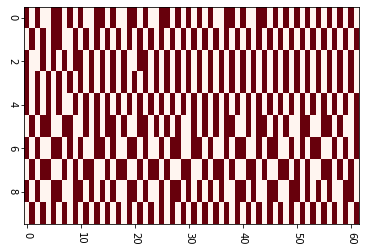

<Figure size 7200x720 with 0 Axes>

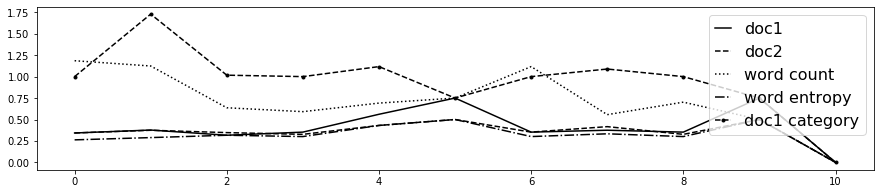

C:\Users\markw\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ma.sh
*************


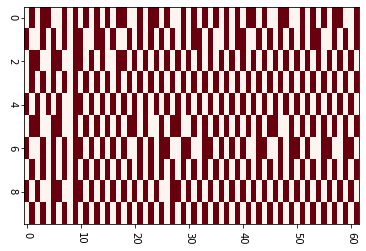

<Figure size 7200x720 with 0 Axes>

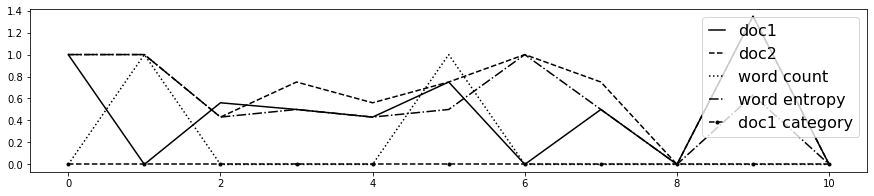

C:\Users\markw\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


tciun
*************


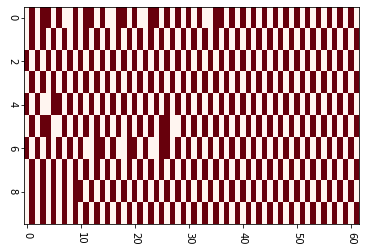

<Figure size 7200x720 with 0 Axes>

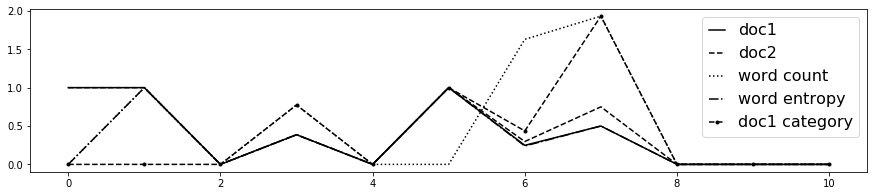

C:\Users\markw\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\markw\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


vishtak
*************


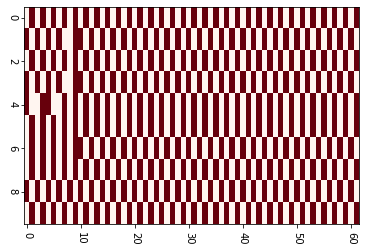

<Figure size 7200x720 with 0 Axes>

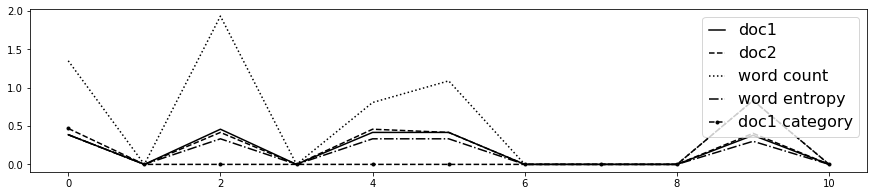

In [26]:
import pandas as pd
import numpy as mp
import networkx as nx
import matplotlib.pyplot as plt
import math
from pandasql import sqldf
from datetime import datetime
from dateutil import relativedelta
import calendar
import nltk as nl
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
# import warnings
# warnings.filterwarnings("ignore")
%matplotlib inline

def tokenize(text):
    from nltk.tokenize import RegexpTokenizer

    tokenizer = RegexpTokenizer(r'\w+')
#         tokens = nl.WhitespaceTokenizer().tokenize(text)
#         tokens = list(set(re.sub("[^a-zA-Z\']", "", token) for token in tokens))
#         tokens = [word for word in tokens if word not in stopwords.words('english')]
#         tokens = list(set(re.sub("[^a-zA-Z]", "", token) for token in tokens))
#         stems = []
#         stemmer = SnowballStemmer("russian")
#         for token in tokens:
#             token = stemmer.stem(token)
#             if token != "":
#                 stems.append(token)
#         return stems 
    stemmer = SnowballStemmer("russian") 
    stop_words = stopwords.words('russian')
    my_words = tokenizer.tokenize(text)

    l=[stemmer.stem(word) for word in my_words if not word in stop_words]
    print (l)

namelist = []
typelist = []
    
# filearray = ["../../Export of PHY124-3 (2).csv"]
# namesdf = alldf["username"].unique()

namesdf = ["lozianikova_aa@students.dvfu.r","ma.sh", "tciun", "vishtak"]
# for sname in namesdf[23:]:
for sname in namesdf:
    studentnamelist = list()
    filelist = list()
    marklist = list()
    dflist = list()
    row = pd.DataFrame()
    pysqldf = lambda q: sqldf(q, globals())

    # mydf = pd.DataFrame()
    # studentdata = pd.read_excel ("../../GSDCOmments-MJ.xlsx", sheet_name="fedorova", header=None)

    myline = getcomparisons (sname)
#     print (myline)

    myline.columns = ["MDate", "x","doc1", "doc2", "comment", "Username"]

    pysqldf = lambda q: sqldf(q, globals())

    mylist = list()
    freqlist = list()
    mylist2 = list()

    oldd = 0
    d1 = 0
    begintime = 0
    endtime = 0

#     studentdata.columns =  ["MDate", "doc1", "doc2", "comment", "x"]
    studentdata = myline
    # print (studentdata.columns.values[0])
    for n in range (len(studentdata)):
    #     print (studentdata.iloc[n,0])
        d = datetime.strptime(studentdata.iloc[n,0],'%Y:%m:%d:%H:%M:%S')
        studentdata.iloc[n,0] = calendar.timegm(d.timetuple())
        if (n==0):
            begintime = studentdata.iloc[n,0]

    #     print (studentdata.iloc[n,0])
    #         x =1

    endtime = studentdata.iloc[n,0]
#     print (str(endtime) + " - " + str(begintime))
    
    print (sname)
    diff = int((endtime - begintime)/10)
#     print (diff)
    if (diff != 0):
        mylist3 = list()
        mylist4 = list()
        mylist5 = list()
        mylist6 = list()
        for n in range (begintime, endtime, diff):
        #     print (n)
            myq = sqldf ("select * from studentdata where MDate > " + str(n) + " and MDate <= " + str(n+diff))
#             print (myq)
            reslist1 = list()
            reslist2 = list()
            wclist = list()
            doccat1 = list()
            doccat2 = list()
            wordlist = list()
            timedifflist = list()
        #     reslist.append([])
            for idx, res in myq.iterrows():
                reslist1.append (res["doc1"])
                doccat1.append (lookuppage (res["doc1"]))
                reslist2.append (res["doc2"]) 
        #         doccat2.append (lookuppage (res["doc2"]))
                wclist.append (round (len (res["comment"])/100, 0))
                wordlist.append (res["comment"])
        #     print (reslist1)
            mylist.append (reslist1)
            mylist2.append(reslist2)
            mylist3.append (wclist)
            mylist4.append (wordlist)
            mylist5.append (doccat1)
            mylist6.append (doccat2)
        # print (mylist5)
        # print (mylist)
        entlist1 = list()
        entlist2 = list()
        entlist3 = list()
        entlist4 = list()
        entlist5 = list()
        entlist6 = list()

        for t in range (len (mylist)):
            entlist1.append ( calcentropy (mylist[t]))
            entlist2.append (calcentropy (mylist2[t]))
            entlist3.append (calcentropy (mylist3[t]))
            entlist4.append (calcentropy (mylist4[t]))
            entlist5.append (calcentropy (mylist5[t]))
        #     entlist6.append (calcentropy (mylist6[t]))

        print ("*************")

        # print (entlist1)
        # for row in mylist4:
        #     print (row)
        #     print (tokenize (' '.join (row)))
        #     print (row)
        #     try:
        #         d1=datetime.strptime(row[0],'%Y:%m:%d:%H:%M:%S')
        #         print (d1.strftime ("%A"))
        #         print (relativedelta.relativedelta(d1, oldd))
        #         print (row[1] )
        #         print (row[2] )
        #         print (row[3])
        #         print (len (row[3]))
        #     except:
        # #         print (d1)
        #         x =0
        #     oldd = d1

        totaldf = pd.DataFrame()
        totaldf ["doc1"] = entlist1
        totaldf ["doc2"] = entlist2
        totaldf ["word count"] = entlist3
        totaldf ["word entropy"] = entlist4
        totaldf ["doc1 category"] = entlist5
        # totaldf ["f"] = entlist6

        df1 = pd.DataFrame()
        totaldf2 = pd.DataFrame()
        for y in range (1,6):
        #     print (y)
            df1 = makebinary(totaldf,y)
            for t in range (len (df1.columns)):
                mylist = df1[df1.columns.values[t]].tolist()
                totaldf2[str(df1.columns.values[t])] = mylist

        count = 0
        params = {'legend.fontsize': 16,
          'legend.handlelength': 1,
         }
        plt.rcParams.update(params)

        # for idx,row in totaldf2.iterrows():
        # #     print (row)

        #     for n in range (0, len (totaldf2.columns.values)):
        # #         print (row.iloc[n])
        #         if (row.iloc[n] == 1):

        #             plt.plot (count,n, "bs")
        #     count = count + 1


        fig, axs = plt.subplots()

        data = totaldf2
        
        axs.imshow(data, cmap="Reds", aspect="auto")
        plt.xticks(rotation=-90)
        plt.yticks(rotation=-90) 
        fig = plt.figure(figsize=(100,10))
        
        plt.show()

 
        totaldf.plot(figsize=(15,3),color="black",style=["-","--", ":", "-.", "--."])     
        plt.show()

        namelist.append (sname)
#         graphtype = input ("enter type of graph:")
#         typelist.append(graphtype)

# myline

# typecat = pd.DataFrame()
# typecat["name"] = namelist
# typecat["graphtype"] = typelist
# typecat.to_excel ("graphtypes2.xls")

In [26]:
# typecat = pd.DataFrame()
# typecat["name"] = namelist
# typecat["graphtype"] = typelist
# typecat.to_excel ("graphtypes2-tmp.xls")
studentdata

,MDate,doc1,doc2,comment,x,Username
931,1540156399,true,GSD_RU_Page_106.jpg,GSD_RU_Page_059.jpg,",текст более понятней.,,",Лаищецев Никита : laischecev-ns@students.dvfu.r
932,1540156582,true,GSD_RU_Page_049.jpg,GSD_RU_Page_059.jpg,",при построении высокопродуктивной организации...",Лаищецев Никита : laischecev-ns@students.dvfu.r
933,1540156709,true,GSD_RU_Page_049.jpg,GSD_RU_Page_037.jpg,",как в предыдушем варианте",Лаищецев Никита : laischecev-ns@students.dvfu.r
934,1540156774,true,GSD_RU_Page_037.jpg,GSD_RU_Page_024.jpg,",В 1 тексте есть раскрытие информации, во 2 - ...",Лаищецев Никита : laischecev-ns@students.dvfu.r
935,1540156864,true,GSD_RU_Page_019.jpg,GSD_RU_Page_024.jpg,",Все потому же, в 1 мало информации (точнее ее...",Лаищецев Никита : laischecev-ns@students.dvfu.r
936,1540157047,true,GSD_RU_Page_023.jpg,GSD_RU_Page_019.jpg,",информативней",Лаищецев Никита : laischecev-ns@students.dvfu.r
937,1540157136,true,GSD_RU_Page_012.jpg,GSD_RU_Page_023.jpg,",полностью согласен со 2 текстом",Лаищецев Никита : laischecev-ns@students.dvfu.r
938,1540157229,true,GSD_RU_Page_012.jpg,GSD_RU_Page_090.jpg,",не узнал ничего нового",Лаищецев Никита : laischecev-ns@students.dvfu.r
939,1540157303,true,GSD_RU_Page_090.jpg,GSD_RU_Page_032.jpg,",тут более интересно",Лаищецев Никита : laischecev-ns@students.dvfu.r
940,1540157449,true,GSD_RU_Page_022.jpg,GSD_RU_Page_032.jpg,",все мы к этому идем, совсем скоро, потенциаль...",Лаищецев Никита : laischecev-ns@students.dvfu.r


In [0]:
from pandasql import sqldf
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import math
import networkx as nx

# G=nx.Graph()

pysqldf = lambda q: sqldf(q, globals())

result1 = pd.DataFrame()
result2 = pd.DataFrame()
personlist = []

doclist = []
numlist = []
mydf3 = pysqldf ("select distinct comparedto from alldf")
for idx1, row1 in mydf3.iterrows():
    if row1[0] != "":
        mycount = pysqldf ("select count(*) from alldf where comparedto = '" + row1[0] + "'")
        for x, u in mycount.iterrows():
            doclist.append(row1[0])
            numlist.append(u[0])
#             print (row1[0] + " : " + str (u[0]))
            
dftot = pd.DataFrame()
dftot["comparedto"] = doclist
dftot["num"] = numlist
# dftot = dftot.sort_values (["num"])
dftot.to_excel ("files_cat2.xls")